In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [2]:
df= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [3]:
df.shape

(1975, 118)

In [4]:
df_test.shape

(550, 118)

In [5]:
pd.set_option('display.max_rows',1975)
pd.set_option('display.max_columns',120)

In [6]:
df.head()

,Unnamed: 0,FIPS,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,AGE513_FEM,AGE1417_TOT,AGE1417_MALE,AGE1417_FEM,AGE1824_TOT,AGE1824_MALE,AGE1824_FEM,AGE16PLUS_TOT,AGE16PLUS_MALE,AGE16PLUS_FEM,AGE18PLUS_TOT,AGE18PLUS_MALE,AGE18PLUS_FEM,AGE1544_TOT,AGE1544_MALE,AGE1544_FEM,AGE2544_TOT,AGE2544_MALE,AGE2544_FEM,AGE4564_TOT,AGE4564_MALE,AGE4564_FEM,AGE65PLUS_TOT,AGE65PLUS_MALE,AGE65PLUS_FEM,AGE04_TOT,AGE04_MALE,AGE04_FEM,AGE59_TOT,AGE59_MALE,AGE59_FEM,AGE1014_TOT,AGE1014_MALE,AGE1014_FEM,AGE1519_TOT,AGE1519_MALE,AGE1519_FEM,AGE2024_TOT,AGE2024_MALE,AGE2024_FEM,AGE2529_TOT,AGE2529_MALE,AGE2529_FEM,AGE3034_TOT,AGE3034_MALE,AGE3034_FEM,AGE3539_TOT,AGE3539_MALE,AGE3539_FEM,AGE4044_TOT,AGE4044_MALE,AGE4044_FEM,AGE4549_TOT,AGE4549_MALE,AGE4549_FEM,AGE5054_TOT,AGE5054_MALE,AGE5054_FEM,AGE5559_TOT,AGE5559_MALE,AGE5559_FEM,AGE6064_TOT,AGE6064_MALE,AGE6064_FEM,AGE6569_TOT,AGE6569_MALE,AGE6569_FEM,AGE7074_TOT,AGE7074_MALE,AGE7074_FEM,AGE7579_TOT,AGE7579_MALE,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM,PerCapitaInc,PovertyAllAgesPct,Immigration_Rate_2000_2010,Ed1LessThanHSPct,Ed3SomeCollegePct,Ed5CollegePlusPct,OwnHomePct,NumUnemployed,Housing_Units,Tier_1,Tier_2,Tier_3,Tier_4,male_officer,female_officer,Republican,Democrat,Diversity-Index,Black or African American alone percentage,American Indian and Alaska Native alone percentage,Asian alone percentage,Native Hawaiian and Other Pacific Islander percentage,Two or More Races percentage,Hispanic or Latino percentage,White alone percentage,Violent crime
0,0,40049,25713.0,12798.0,12915.0,1506.0,769.0,737.0,3252.0,1666.0,1586.0,1606.0,836.0,770.0,2124.0,1107.0,1017.0,20087.0,9912.0,10175.0,19349.0,9527.0,9822.0,9660.0,4909.0,4751.0,6353.0,3183.0,3170.0,6203.0,3113.0,3090.0,4669.0,2124.0,2545.0,1506.0,769.0,737.0,1772.0,897.0,875.0,1903.0,986.0,917.0,1733.0,901.0,832.0,1574.0,825.0,749.0,1475.0,741.0,734.0,1570.0,756.0,814.0,1595.0,795.0,800.0,1713.0,891.0,822.0,1525.0,798.0,727.0,1538.0,800.0,738.0,1465.0,698.0,767.0,1675.0,817.0,858.0,1552.0,738.0,814.0,1178.0,566.0,612.0,858.0,386.0,472.0,553.0,226.0,327.0,528.0,208.0,320.0,39.2,38.5,40.0,23020.0,15.1,0.326510,14.347873,21.664160,14.519768,68.354916,402.0,12827.0,2.0,2.0,2.0,1.0,47.0,5.0,0.45,0.40,0.386772,2.7,8.4,0.5,0.1,5.2,7.2,77.3,49
1,1,39095,426643.0,207623.0,219020.0,25519.0,13051.0,12468.0,48466.0,24784.0,23682.0,22685.0,11520.0,11165.0,39361.0,19893.0,19468.0,341169.0,163948.0,177221.0,329973.0,158268.0,171705.0,167264.0,83051.0,84213.0,111023.0,54584.0,56439.0,104385.0,50738.0,53647.0,75204.0,33053.0,42151.0,25519.0,13051.0,12468.0,26890.0,13743.0,13147.0,27381.0,13987.0,13394.0,28433.0,14501.0,13932.0,27808.0,13966.0,13842.0,28761.0,14273.0,14488.0,30825.0,15248.0,15577.0,26463.0,12888.0,13575.0,24974.0,12175.0,12799.0,23459.0,11333.0,12126.0,26192.0,12863.0,13329.0,26330.0,12827.0,13503.0,28404.0,13715.0,14689.0,25328.0,11934.0,13394.0,20286.0,9332.0,10954.0,13327.0,5841.0,7486.0,8146.0,3264.0,4882.0,8117.0,2682.0,5435.0,38.3,36.9,39.7,28361.0,18.7,1.206079,10.799676,23.540621,26.278413,59.973753,9792.0,202489.0,4.0,4.0,3.0,2.0,575.0,112.0,0.42,0.40,0.463857,19.5,0.4,1.7,0.0,2.8,6.5,70.2,128
2,2,26055,96464.0,47846.0,48618.0,4563.0,2440.0,2123.0,9357.0,4845.0,4512.0,4614.0,2330.0,2284.0,7540.0,3905.0,3635.0,80186.0,39359.0,40827.0,77930.0,38231.0,39699.0,34964.0,17866.0,17098.0,24013.0,12255.0,11758.0,24917.0,12262.0,12655.0,21460.0,9809.0,11651.0,4563.0,2440.0,2123.0,5117.0,2648.0,2469.0,5443.0,2821.0,2622.0,5668.0,2915.0,2753.0,5283.0,2696.0,2587.0,5629.0,2942.0,2687.0,6043.0,3067.0,2976.0,6330.0,3192.0,3138.0,6011.0,3054.0,2957.0,5281.0,2627.0,2654.0,5878.0,2994.0,2884.0,6336.0,3095.0,3241.0,7422.0,3546.0,3876.0,7095.0,3419.0,3676.0,5807.0,2833.0,2974.0,3999.0,1845.0,2154.0,2300.0,984.0,1316.0,2259.0,728.0,1531.0,43.4,41.9,45.0,33754.0,9.5,0.550613,4.812333,24.889185,35.056958,76.288577,1715.0,

In [7]:
X_train= df.drop(['Unnamed: 0','FIPS','Violent crime'], axis=1)
X_test= df_test.drop(['Unnamed: 0','FIPS','Violent crime'], axis=1)

In [8]:
X_train.shape

(1975, 115)

In [9]:
y_train= df['Violent crime']
y_test= df_test['Violent crime']

In [10]:
isnull_sum = X_train.isnull().sum()
isnull_sum

POPESTIMATE                                                4
POPEST_MALE                                                4
POPEST_FEM                                                 4
UNDER5_TOT                                                 4
UNDER5_MALE                                                4
UNDER5_FEM                                                 4
AGE513_TOT                                                 4
AGE513_MALE                                                4
AGE513_FEM                                                 4
AGE1417_TOT                                                4
AGE1417_MALE                                               4
AGE1417_FEM                                                4
AGE1824_TOT                                                4
AGE1824_MALE                                               4
AGE1824_FEM                                                4
AGE16PLUS_TOT                                              4
AGE16PLUS_MALE          

In [11]:
num_vars = X_train.select_dtypes(include=["int64", "float64"]).columns
num_vars_miss = [var for var in num_vars if isnull_sum[var]>0]

In [12]:
num_vars_miss

['POPESTIMATE',
 'POPEST_MALE',
 'POPEST_FEM',
 'UNDER5_TOT',
 'UNDER5_MALE',
 'UNDER5_FEM',
 'AGE513_TOT',
 'AGE513_MALE',
 'AGE513_FEM',
 'AGE1417_TOT',
 'AGE1417_MALE',
 'AGE1417_FEM',
 'AGE1824_TOT',
 'AGE1824_MALE',
 'AGE1824_FEM',
 'AGE16PLUS_TOT',
 'AGE16PLUS_MALE',
 'AGE16PLUS_FEM',
 'AGE18PLUS_TOT',
 'AGE18PLUS_MALE',
 'AGE18PLUS_FEM',
 'AGE1544_TOT',
 'AGE1544_MALE',
 'AGE1544_FEM',
 'AGE2544_TOT',
 'AGE2544_MALE',
 'AGE2544_FEM',
 'AGE4564_TOT',
 'AGE4564_MALE',
 'AGE4564_FEM',
 'AGE65PLUS_TOT',
 'AGE65PLUS_MALE',
 'AGE65PLUS_FEM',
 'AGE04_TOT',
 'AGE04_MALE',
 'AGE04_FEM',
 'AGE59_TOT',
 'AGE59_MALE',
 'AGE59_FEM',
 'AGE1014_TOT',
 'AGE1014_MALE',
 'AGE1014_FEM',
 'AGE1519_TOT',
 'AGE1519_MALE',
 'AGE1519_FEM',
 'AGE2024_TOT',
 'AGE2024_MALE',
 'AGE2024_FEM',
 'AGE2529_TOT',
 'AGE2529_MALE',
 'AGE2529_FEM',
 'AGE3034_TOT',
 'AGE3034_MALE',
 'AGE3034_FEM',
 'AGE3539_TOT',
 'AGE3539_MALE',
 'AGE3539_FEM',
 'AGE4044_TOT',
 'AGE4044_MALE',
 'AGE4044_FEM',
 'AGE4549_TOT',
 'AGE4

In [13]:
num_var_mean=['PerCapitaInc',
 'PovertyAllAgesPct',
 'Immigration_Rate_2000_2010',
 'Ed1LessThanHSPct',
 'Ed3SomeCollegePct',
 'Ed5CollegePlusPct',
 'OwnHomePct',
 'NumUnemployed',
 'Housing_Units','Diversity-Index',
 'Black or African American alone percentage',
 'American Indian and Alaska Native alone percentage',
 'Asian alone percentage',
 'Native Hawaiian and Other Pacific Islander percentage',
 'Two or More Races percentage',
 'Hispanic or Latino percentage',
 'White alone percentage','male_officer',
 'female_officer']

In [14]:
len(num_var_mean)

19

In [15]:
num_var_median=['POPESTIMATE',
 'POPEST_MALE',
 'POPEST_FEM',
 'UNDER5_TOT',
 'UNDER5_MALE',
 'UNDER5_FEM',
 'AGE513_TOT',
 'AGE513_MALE',
 'AGE513_FEM',
 'AGE1417_TOT',
 'AGE1417_MALE',
 'AGE1417_FEM',
 'AGE1824_TOT',
 'AGE1824_MALE',
 'AGE1824_FEM',
 'AGE16PLUS_TOT',
 'AGE16PLUS_MALE',
 'AGE16PLUS_FEM',
 'AGE18PLUS_TOT',
 'AGE18PLUS_MALE',
 'AGE18PLUS_FEM',
 'AGE1544_TOT',
 'AGE1544_MALE',
 'AGE1544_FEM',
 'AGE2544_TOT',
 'AGE2544_MALE',
 'AGE2544_FEM',
 'AGE4564_TOT',
 'AGE4564_MALE',
 'AGE4564_FEM',
 'AGE65PLUS_TOT',
 'AGE65PLUS_MALE',
 'AGE65PLUS_FEM',
 'AGE04_TOT',
 'AGE04_MALE',
 'AGE04_FEM',
 'AGE59_TOT',
 'AGE59_MALE',
 'AGE59_FEM',
 'AGE1014_TOT',
 'AGE1014_MALE',
 'AGE1014_FEM',
 'AGE1519_TOT',
 'AGE1519_MALE',
 'AGE1519_FEM',
 'AGE2024_TOT',
 'AGE2024_MALE',
 'AGE2024_FEM',
 'AGE2529_TOT',
 'AGE2529_MALE',
 'AGE2529_FEM',
 'AGE3034_TOT',
 'AGE3034_MALE',
 'AGE3034_FEM',
 'AGE3539_TOT',
 'AGE3539_MALE',
 'AGE3539_FEM',
 'AGE4044_TOT',
 'AGE4044_MALE',
 'AGE4044_FEM',
 'AGE4549_TOT',
 'AGE4549_MALE',
 'AGE4549_FEM',
 'AGE5054_TOT',
 'AGE5054_MALE',
 'AGE5054_FEM',
 'AGE5559_TOT',
 'AGE5559_MALE',
 'AGE5559_FEM',
 'AGE6064_TOT',
 'AGE6064_MALE',
 'AGE6064_FEM',
 'AGE6569_TOT',
 'AGE6569_MALE',
 'AGE6569_FEM',
 'AGE7074_TOT',
 'AGE7074_MALE',
 'AGE7074_FEM',
 'AGE7579_TOT',
 'AGE7579_MALE',
 'AGE7579_FEM',
 'AGE8084_TOT',
 'AGE8084_MALE',
 'AGE8084_FEM',
 'AGE85PLUS_TOT',
 'AGE85PLUS_MALE',
 'AGE85PLUS_FEM',
 'MEDIAN_AGE_TOT',
 'MEDIAN_AGE_MALE',
 'MEDIAN_AGE_FEM']
len(num_var_median)

90

In [16]:
num_var_mode=['Tier_1',
 'Tier_2',
 'Tier_3',
 'Tier_4']

In [17]:
num_var_mean_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])
num_var_median_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])
num_var_mode_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent"))])

In [18]:
preprocessor = ColumnTransformer(transformers=[("mean_imputer", num_var_mean_imputer, num_var_mean),
                                ("median_imputer", num_var_median_imputer, num_var_median),
                               ("mode_imputer", num_var_mode_imputer, num_var_mode)])

In [19]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['PerCapitaInc', 'PovertyAllAgesPct',
                                  'Immigration_Rate_2000_2010',
                                  'Ed1LessThanHSPct', 'Ed3SomeCollegePct',
                                  'Ed5CollegePlusPct', 'OwnHomePct',
                                  'NumUnemployed', 'Housing_Units',
                                  'Diversity-Index',
                                  'Black or African American alone percentage',
                                  'American Indian and Alaska Nativ...
                                  'AGE16PLUS_TOT', 'AGE16PLUS_MALE',
                                  'AGE16PLUS_FEM', 'AGE18PLUS_TOT',
                                  'AGE18PLUS_MALE', 'AGE18PLUS_FEM',
                                  'AGE1544_TOT', 'AGE1544_MALE', 'AGE1544_FEM',
                                  'AGE2544_TOT', 'AGE2544_MALE', 'AGE2544_FEM',
                                  'AGE4564_TOT', 'AGE4564_MALE', 'AGE4564_FEM', ...]),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Tier_1', 'Tier_2', 'Tier_3', 'Tier_4'])])

In [20]:
preprocessor.transform

<bound method ColumnTransformer.transform of ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['PerCapitaInc', 'PovertyAllAgesPct',
                                  'Immigration_Rate_2000_2010',
                                  'Ed1LessThanHSPct', 'Ed3SomeCollegePct',
                                  'Ed5CollegePlusPct', 'OwnHomePct',
                                  'NumUnemployed', 'Housing_Units',
                                  'Diversity-Index',
                                  'Black or African American alone percentage',
                                  'American Indian and Alaska Nativ...
                                  'AGE16PLUS_TOT', 'AGE16PLUS_MALE',
                                  'AGE16PLUS_FEM', 'AGE18PLUS_TOT',
                                  'AGE18PLUS_MALE', 'AGE18PLUS_FEM',
                                  'AGE1544_TOT', 'AGE1544_MALE', 'AG

In [21]:
preprocessor.named_transformers_["mean_imputer"].named_steps["imputer"].statistics_

array([2.69443952e+04, 1.49890872e+01, 1.20927490e+00, 1.34478351e+01,
       2.19904554e+01, 2.12524987e+01, 7.17710588e+01, 1.86870219e+03,
       4.16451837e+04, 2.96263035e-01, 8.11347915e+00, 1.92049847e+00,
       1.26592065e+00, 8.65208545e-02, 1.80025432e+00, 9.57695829e+00,
       7.82173449e+01, 9.20072159e+01, 1.34600120e+01])

In [22]:
preprocessor.named_transformers_["mode_imputer"].named_steps["imputer"].statistics_

array([3., 3., 2., 1.])

In [23]:
preprocessor.named_transformers_["median_imputer"].named_steps["imputer"].statistics_

array([26866. , 13453. , 13289. ,  1445. ,   740. ,   704. ,  2938. ,
        1502. ,  1434. ,  1416. ,   734. ,   679. ,  2196. ,  1171. ,
        1017. , 21752. , 10952. , 10837. , 21060. , 10572. , 10510. ,
        9623. ,  5042. ,  4578. ,  6314. ,  3286. ,  3029. ,  6887. ,
        3469. ,  3420. ,  5346. ,  2505. ,  2925. ,  1445. ,   740. ,
         704. ,  1599. ,   815. ,   778. ,  1679. ,   868. ,   817. ,
        1666. ,   870. ,   794. ,  1583. ,   846. ,   738. ,  1560. ,
         819. ,   722. ,  1604. ,   842. ,   779. ,  1562. ,   812. ,
         748. ,  1594. ,   823. ,   777. ,  1512. ,   778. ,   732. ,
        1649. ,   844. ,   802. ,  1784. ,   895. ,   889. ,  1887. ,
         934. ,   959. ,  1771. ,   853. ,   897. ,  1423. ,   694. ,
         740. ,  1014. ,   474. ,   539. ,   620. ,   273. ,   346. ,
         558. ,   202. ,   357. ,    41.6,    40.4,    42.9])

In [24]:
X_train_clean = preprocessor.transform(X_train)
X_test_clean = preprocessor.transform(X_test)

In [25]:
X_train_clean

array([[2.30200000e+04, 1.51000000e+01, 3.26509649e-01, ...,
        2.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [2.83610000e+04, 1.87000000e+01, 1.20607865e+00, ...,
        4.00000000e+00, 3.00000000e+00, 2.00000000e+00],
       [3.37540000e+04, 9.50000000e+00, 5.50612789e-01, ...,
        4.00000000e+00, 4.00000000e+00, 3.00000000e+00],
       ...,
       [2.60370000e+04, 1.20000000e+01, 4.12899179e-01, ...,
        3.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [2.39780000e+04, 1.30000000e+01, 2.82944376e+00, ...,
        3.00000000e+00, 3.00000000e+00, 3.00000000e+00],
       [3.15530000e+04, 1.06000000e+01, 4.34832361e-01, ...,
        2.00000000e+00, 2.00000000e+00, 1.00000000e+00]])

In [26]:
not_null_train= df[['Republican','Democrat']]
not_null_test= df_test[['Republican','Democrat']]

In [27]:
X_train_clean_miss_var = pd.DataFrame(X_train_clean, columns=num_var_mean+num_var_median+num_var_mode)
X_test_clean_miss_var = pd.DataFrame(X_test_clean, columns=num_var_mean+num_var_median+num_var_mode)

In [28]:
X_train_clean_miss_var.head()

,PerCapitaInc,PovertyAllAgesPct,Immigration_Rate_2000_2010,Ed1LessThanHSPct,Ed3SomeCollegePct,Ed5CollegePlusPct,OwnHomePct,NumUnemployed,Housing_Units,Diversity-Index,Black or African American alone percentage,American Indian and Alaska Native alone percentage,Asian alone percentage,Native Hawaiian and Other Pacific Islander percentage,Two or More Races percentage,Hispanic or Latino percentage,White alone percentage,male_officer,female_officer,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,AGE513_FEM,AGE1417_TOT,AGE1417_MALE,AGE1417_FEM,AGE1824_TOT,AGE1824_MALE,AGE1824_FEM,AGE16PLUS_TOT,AGE16PLUS_MALE,AGE16PLUS_FEM,AGE18PLUS_TOT,AGE18PLUS_MALE,AGE18PLUS_FEM,AGE1544_TOT,AGE1544_MALE,AGE1544_FEM,AGE2544_TOT,AGE2544_MALE,AGE2544_FEM,AGE4564_TOT,AGE4564_MALE,AGE4564_FEM,AGE65PLUS_TOT,AGE65PLUS_MALE,AGE65PLUS_FEM,AGE04_TOT,AGE04_MALE,AGE04_FEM,AGE59_TOT,AGE59_MALE,AGE59_FEM,AGE1014_TOT,AGE1014_MALE,AGE1014_FEM,AGE1519_TOT,AGE1519_MALE,AGE1519_FEM,AGE2024_TOT,AGE2024_MALE,AGE2024_FEM,AGE2529_TOT,AGE2529_MALE,AGE2529_FEM,AGE3034_TOT,AGE3034_MALE,AGE3034_FEM,AGE3539_TOT,AGE3539_MALE,AGE3539_FEM,AGE4044_TOT,AGE4044_MALE,AGE4044_FEM,AGE4549_TOT,AGE4549_MALE,AGE4549_FEM,AGE5054_TOT,AGE5054_MALE,AGE5054_FEM,AGE5559_TOT,AGE5559_MALE,AGE5559_FEM,AGE6064_TOT,AGE6064_MALE,AGE6064_FEM,AGE6569_TOT,AGE6569_MALE,AGE6569_FEM,AGE7074_TOT,AGE7074_MALE,AGE7074_FEM,AGE7579_TOT,AGE7579_MALE,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM,Tier_1,Tier_2,Tier_3,Tier_4
0,23020.0,15.1,0.326510,14.347873,21.664160,14.519768,68.354916,402.0,12827.0,0.386772,2.7,8.4,0.5,0.1,5.2,7.2,77.3,47.0,5.0,25713.0,12798.0,12915.0,1506.0,769.0,737.0,3252.0,1666.0,1586.0,1606.0,836.0,770.0,2124.0,1107.0,1017.0,20087.0,9912.0,10175.0,19349.0,9527.0,9822.0,9660.0,4909.0,4751.0,6353.0,3183.0,3170.0,6203.0,3113.0,3090.0,4669.0,2124.0,2545.0,1506.0,769.0,737.0,1772.0,897.0,875.0,1903.0,986.0,917.0,1733.0,901.0,832.0,1574.0,825.0,749.0,1475.0,741.0,734.0,1570.0,756.0,814.0,1595.0,795.0,800.0,1713.0,891.0,822.0,1525.0,798.0,727.0,1538.0,800.0,738.0,1465.0,698.0,767.0,1675.0,817.0,858.0,1552.0,738.0,814.0,1178.0,566.0,612.0,858.0,386.0,472.0,553.0,226.0,327.0,528.0,208.0,320.0,39.2,38.5,40.0,2.0,2.0,2.0,1.0
1,28361.0,18.7,1.206079,10.799676,23.540621,26.278413,59.973753,9792.0,202489.0,0.463857,19.5,0.4,1.7,0.0,2.8,6.5,70.2,575.0,112.0,426643.0,207623.0,219020.0,25519.0,13051.0,12468.0,48466.0,24784.0,23682.0,22685.0,11520.0,11165.0,39361.0,19893.0,19468.0,341169.0,163948.0,177221.0,329973.0,158268.0,171705.0,167264.0,83051.0,84213.0,111023.0,54584.0,56439.0,104385.0,50738.0,53647.0,75204.0,33053.0,42151.0,25519.0,13051.0,12468.0,26890.0,13743.0,13147.0,27381.0,13987.0,13394.0,28433.0,14501.0,13932.0,27808.0,13966.0,13842.0,28761.0,14273.0,14488.0,30825.0,15248.0,15577.0,26463.0,12888.0,13575.0,24974.0,12175.0,12799.0,23459.0,11333.0,12126.0,26192.0,12863.0,13329.0,26330.0,12827.0,13503.0,28404.0,13715.0,14689.0,25328.0,11934.0,13394.0,20286.0,9332.0,10954.0,13327.0,5841.0,7486.0,8146.0,3264.0,4882.0,8117.0,2682.0,5435.0,38.3,36.9,39.7,4.0,4.0,3.0,2.0
2,33754.0,9.5,0.550613,4.812333,24.889185,35.056958,76.288577,1715.0,42185.0,0.137489,1.3,1.2,0.7,0.0,1.7,2.6,92.8,64.0,4.0,96464.0,47846.0,48618.0,4563.0,2440.0,2123.0,9357.0,4845.0,4512.0,4614.0,2330.0,2284.0,7540.0,3905.0,3635.0,80186.0,39359.0,40827.0,77930.0,38231.0,39699.0,34964.0,17866.0,17098.0,24013.0,12255.0,11758.0,24917.0,12262.0,12655.0,21460.0,9809.0,11651.0,4563.0,2440.0,2123.0,5117.0,2648.0,2469.0,5443.0,2821.0,2622.0,5668.0,2915.0,2753.0,5283.0,2696.0,2587.0,5629.0,2942.0,2687.0,6043.0,3067.0,2976.0,6330.0,3192.0,3138.0,6011.0,3054.0,2957.0,5281.0,2627.0,2654.0,5878.0,2994.0,2884.0,6336.0,3095.0,3241.0,7422.0,3546.0,3876.0,7095.0,3419.0,3676.0,5807.0,2833.0,2974.0,3999.0,1845.0,2154.0,2300.0,984.0,1316.0,2259.0,728.0,1531.0,43.4,41.9,45.0,4.0,4.0,4.0,3.0
3,23626.0,7.8,1.167889,36.2609

In [29]:
X_test_clean_miss_var.head()

,PerCapitaInc,PovertyAllAgesPct,Immigration_Rate_2000_2010,Ed1LessThanHSPct,Ed3SomeCollegePct,Ed5CollegePlusPct,OwnHomePct,NumUnemployed,Housing_Units,Diversity-Index,Black or African American alone percentage,American Indian and Alaska Native alone percentage,Asian alone percentage,Native Hawaiian and Other Pacific Islander percentage,Two or More Races percentage,Hispanic or Latino percentage,White alone percentage,male_officer,female_officer,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,AGE513_FEM,AGE1417_TOT,AGE1417_MALE,AGE1417_FEM,AGE1824_TOT,AGE1824_MALE,AGE1824_FEM,AGE16PLUS_TOT,AGE16PLUS_MALE,AGE16PLUS_FEM,AGE18PLUS_TOT,AGE18PLUS_MALE,AGE18PLUS_FEM,AGE1544_TOT,AGE1544_MALE,AGE1544_FEM,AGE2544_TOT,AGE2544_MALE,AGE2544_FEM,AGE4564_TOT,AGE4564_MALE,AGE4564_FEM,AGE65PLUS_TOT,AGE65PLUS_MALE,AGE65PLUS_FEM,AGE04_TOT,AGE04_MALE,AGE04_FEM,AGE59_TOT,AGE59_MALE,AGE59_FEM,AGE1014_TOT,AGE1014_MALE,AGE1014_FEM,AGE1519_TOT,AGE1519_MALE,AGE1519_FEM,AGE2024_TOT,AGE2024_MALE,AGE2024_FEM,AGE2529_TOT,AGE2529_MALE,AGE2529_FEM,AGE3034_TOT,AGE3034_MALE,AGE3034_FEM,AGE3539_TOT,AGE3539_MALE,AGE3539_FEM,AGE4044_TOT,AGE4044_MALE,AGE4044_FEM,AGE4549_TOT,AGE4549_MALE,AGE4549_FEM,AGE5054_TOT,AGE5054_MALE,AGE5054_FEM,AGE5559_TOT,AGE5559_MALE,AGE5559_FEM,AGE6064_TOT,AGE6064_MALE,AGE6064_FEM,AGE6569_TOT,AGE6569_MALE,AGE6569_FEM,AGE7074_TOT,AGE7074_MALE,AGE7074_FEM,AGE7579_TOT,AGE7579_MALE,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM,Tier_1,Tier_2,Tier_3,Tier_4
0,32542.0,10.2,2.718688,11.225166,22.984966,29.827206,72.142746,2184.0,51226.0,0.442433,18.0,0.4,1.8,0.1,1.9,6.8,72.1,267.0,28.0,152882.0,74569.0,78313.0,8297.0,4233.0,4064.0,17519.0,8849.0,8670.0,8920.0,4463.0,4457.0,12942.0,6596.0,6346.0,122588.0,59259.0,63329.0,118146.0,57024.0,61122.0,59244.0,29176.0,30068.0,39612.0,19228.0,20384.0,42267.0,20696.0,21571.0,23325.0,10504.0,12821.0,8297.0,4233.0,4064.0,9421.0,4702.0,4719.0,10328.0,5258.0,5070.0,10195.0,5166.0,5029.0,9437.0,4782.0,4655.0,9401.0,4649.0,4752.0,9766.0,4730.0,5036.0,10192.0,4919.0,5273.0,10253.0,4930.0,5323.0,10004.0,4871.0,5133.0,11484.0,5629.0,5855.0,11097.0,5466.0,5631.0,9682.0,4730.0,4952.0,7911.0,3706.0,4205.0,6280.0,2916.0,3364.0,4650.0,2072.0,2578.0,2580.0,1117.0,1463.0,1904.0,693.0,1211.0,39.7,38.8,40.5,4.0,4.0,4.0,3.0
1,21770.0,18.2,-1.655438,14.041505,26.149194,17.340942,46.908340,1402.0,29749.0,0.496160,21.4,0.7,1.5,0.4,2.9,7.3,67.2,116.0,13.0,73037.0,38722.0,34315.0,6784.0,3496.0,3288.0,9720.0,5026.0,4694.0,3710.0,1906.0,1804.0,11436.0,7777.0,3659.0,54595.0,29194.0,25401.0,52823.0,28294.0,24529.0,33914.0,19792.0,14122.0,19749.0,10622.0,9127.0,12293.0,5893.0,6400.0,9345.0,4002.0,5343.0,6784.0,3496.0,3288.0,5761.0,2983.0,2778.0,4940.0,2556.0,2384.0,5028.0,2958.0,2070.0,9137.0,6212.0,2925.0,6919.0,4026.0,2893.0,5403.0,2839.0,2564.0,3996.0,2083.0,1913.0,3431.0,1674.0,1757.0,3025.0,1511.0,1514.0,3020.0,1442.0,1578.0,3117.0,1435.0,1682.0,3131.0,1505.0,1626.0,2937.0,1365.0,1572.0,2367.0,1087.0,1280.0,1760.0,739.0,1021.0,1157.0,435.0,722.0,1124.0,376.0,748.0,28.4,26.2,31.5,4.0,4.0,3.0,2.0
2,48460.0,6.7,0.407694,2.425532,30.085106,38.723404,80.927252,88.0,3566.0,0.206903,1.1,1.1,1.5,0.2,1.9,6.1,88.8,42.0,9.0,5891.0,3095.0,2796.0,182.0,82.0,100.0,397.0,187.0,210.0,230.0,118.0,112.0,284.0,166.0,118.0,5204.0,2771.0,2433.0,5082.0,2708.0,2374.0,1942.0,1039.0,903.0,1470.0,778.0,692.0,2117.0,1131.0,986.0,1211.0,633.0,578.0,182.0,82.0,100.0,215.0,98.0,117.0,224.0,112.0,112.0,271.0,142.0,129.0,201.0,119.0,82.0,244.0,135.0,109.0,390.0,198.0,192.0,410.0,222.0,188.0,426.0,223.0,203.0,553.0,281.0,272.0,474.0,278.0,196.0,499.0,261.0,238.0,591.0,311.0,280.0,539.0,294.0,245.0,348.0,176.0,172.0,189.0,105.0,84.0,98.0,49.0,49.0,37.0,9.0,28.0,48.3,48.9,47.8,3.0,3.0,2.0,1.0
3,25537.0,13.7,0.047307,8.771502,21.611565,19.440039,74.691172,525.0,10889.0,0.076058,1.4,0.1,0.4,0.0,1.2,0.8,96.1,35.0,2.0,21733.0,10790.0,10

In [30]:
X_train_clean= pd.concat([X_train_clean_miss_var,not_null_train], axis=1)
X_test_clean= pd.concat([X_test_clean_miss_var,not_null_test], axis=1)

In [31]:
X_train_clean.shape, X_test_clean.shape

((1975, 115), (550, 115))

In [32]:
X_test_clean.head()

,PerCapitaInc,PovertyAllAgesPct,Immigration_Rate_2000_2010,Ed1LessThanHSPct,Ed3SomeCollegePct,Ed5CollegePlusPct,OwnHomePct,NumUnemployed,Housing_Units,Diversity-Index,Black or African American alone percentage,American Indian and Alaska Native alone percentage,Asian alone percentage,Native Hawaiian and Other Pacific Islander percentage,Two or More Races percentage,Hispanic or Latino percentage,White alone percentage,male_officer,female_officer,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,AGE513_FEM,AGE1417_TOT,AGE1417_MALE,AGE1417_FEM,AGE1824_TOT,AGE1824_MALE,AGE1824_FEM,AGE16PLUS_TOT,AGE16PLUS_MALE,AGE16PLUS_FEM,AGE18PLUS_TOT,AGE18PLUS_MALE,AGE18PLUS_FEM,AGE1544_TOT,AGE1544_MALE,AGE1544_FEM,AGE2544_TOT,AGE2544_MALE,AGE2544_FEM,AGE4564_TOT,AGE4564_MALE,AGE4564_FEM,AGE65PLUS_TOT,AGE65PLUS_MALE,AGE65PLUS_FEM,AGE04_TOT,AGE04_MALE,AGE04_FEM,AGE59_TOT,AGE59_MALE,AGE59_FEM,AGE1014_TOT,AGE1014_MALE,AGE1014_FEM,AGE1519_TOT,AGE1519_MALE,AGE1519_FEM,AGE2024_TOT,AGE2024_MALE,AGE2024_FEM,AGE2529_TOT,AGE2529_MALE,AGE2529_FEM,AGE3034_TOT,AGE3034_MALE,AGE3034_FEM,AGE3539_TOT,AGE3539_MALE,AGE3539_FEM,AGE4044_TOT,AGE4044_MALE,AGE4044_FEM,AGE4549_TOT,AGE4549_MALE,AGE4549_FEM,AGE5054_TOT,AGE5054_MALE,AGE5054_FEM,AGE5559_TOT,AGE5559_MALE,AGE5559_FEM,AGE6064_TOT,AGE6064_MALE,AGE6064_FEM,AGE6569_TOT,AGE6569_MALE,AGE6569_FEM,AGE7074_TOT,AGE7074_MALE,AGE7074_FEM,AGE7579_TOT,AGE7579_MALE,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM,Tier_1,Tier_2,Tier_3,Tier_4,Republican,Democrat
0,32542.0,10.2,2.718688,11.225166,22.984966,29.827206,72.142746,2184.0,51226.0,0.442433,18.0,0.4,1.8,0.1,1.9,6.8,72.1,267.0,28.0,152882.0,74569.0,78313.0,8297.0,4233.0,4064.0,17519.0,8849.0,8670.0,8920.0,4463.0,4457.0,12942.0,6596.0,6346.0,122588.0,59259.0,63329.0,118146.0,57024.0,61122.0,59244.0,29176.0,30068.0,39612.0,19228.0,20384.0,42267.0,20696.0,21571.0,23325.0,10504.0,12821.0,8297.0,4233.0,4064.0,9421.0,4702.0,4719.0,10328.0,5258.0,5070.0,10195.0,5166.0,5029.0,9437.0,4782.0,4655.0,9401.0,4649.0,4752.0,9766.0,4730.0,5036.0,10192.0,4919.0,5273.0,10253.0,4930.0,5323.0,10004.0,4871.0,5133.0,11484.0,5629.0,5855.0,11097.0,5466.0,5631.0,9682.0,4730.0,4952.0,7911.0,3706.0,4205.0,6280.0,2916.0,3364.0,4650.0,2072.0,2578.0,2580.0,1117.0,1463.0,1904.0,693.0,1211.0,39.7,38.8,40.5,4.0,4.0,4.0,3.0,0.41,0.41
1,21770.0,18.2,-1.655438,14.041505,26.149194,17.340942,46.908340,1402.0,29749.0,0.496160,21.4,0.7,1.5,0.4,2.9,7.3,67.2,116.0,13.0,73037.0,38722.0,34315.0,6784.0,3496.0,3288.0,9720.0,5026.0,4694.0,3710.0,1906.0,1804.0,11436.0,7777.0,3659.0,54595.0,29194.0,25401.0,52823.0,28294.0,24529.0,33914.0,19792.0,14122.0,19749.0,10622.0,9127.0,12293.0,5893.0,6400.0,9345.0,4002.0,5343.0,6784.0,3496.0,3288.0,5761.0,2983.0,2778.0,4940.0,2556.0,2384.0,5028.0,2958.0,2070.0,9137.0,6212.0,2925.0,6919.0,4026.0,2893.0,5403.0,2839.0,2564.0,3996.0,2083.0,1913.0,3431.0,1674.0,1757.0,3025.0,1511.0,1514.0,3020.0,1442.0,1578.0,3117.0,1435.0,1682.0,3131.0,1505.0,1626.0,2937.0,1365.0,1572.0,2367.0,1087.0,1280.0,1760.0,739.0,1021.0,1157.0,435.0,722.0,1124.0,376.0,748.0,28.4,26.2,31.5,4.0,4.0,3.0,2.0,0.44,0.43
2,48460.0,6.7,0.407694,2.425532,30.085106,38.723404,80.927252,88.0,3566.0,0.206903,1.1,1.1,1.5,0.2,1.9,6.1,88.8,42.0,9.0,5891.0,3095.0,2796.0,182.0,82.0,100.0,397.0,187.0,210.0,230.0,118.0,112.0,284.0,166.0,118.0,5204.0,2771.0,2433.0,5082.0,2708.0,2374.0,1942.0,1039.0,903.0,1470.0,778.0,692.0,2117.0,1131.0,986.0,1211.0,633.0,578.0,182.0,82.0,100.0,215.0,98.0,117.0,224.0,112.0,112.0,271.0,142.0,129.0,201.0,119.0,82.0,244.0,135.0,109.0,390.0,198.0,192.0,410.0,222.0,188.0,426.0,223.0,203.0,553.0,281.0,272.0,474.0,278.0,196.0,499.0,261.0,238.0,591.0,311.0,280.0,539.0,294.0,245.0,348.0,176.0,172.0,189.0,105.0,84.0,98.0,49.0,49.0,37.0,9.0,28.0,48.3,48.9,47.8,3.0,3.0,2.0,1.0,0.41,0.42
3,25537.0,13.7,0.047307,8.771502,21.611565,19.440039,74.691172,525.0,10889.0,0.076058,1.4,0.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20240\834973153.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[var],bins=20,color='k',label='Original')
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20240\834973153.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-lev

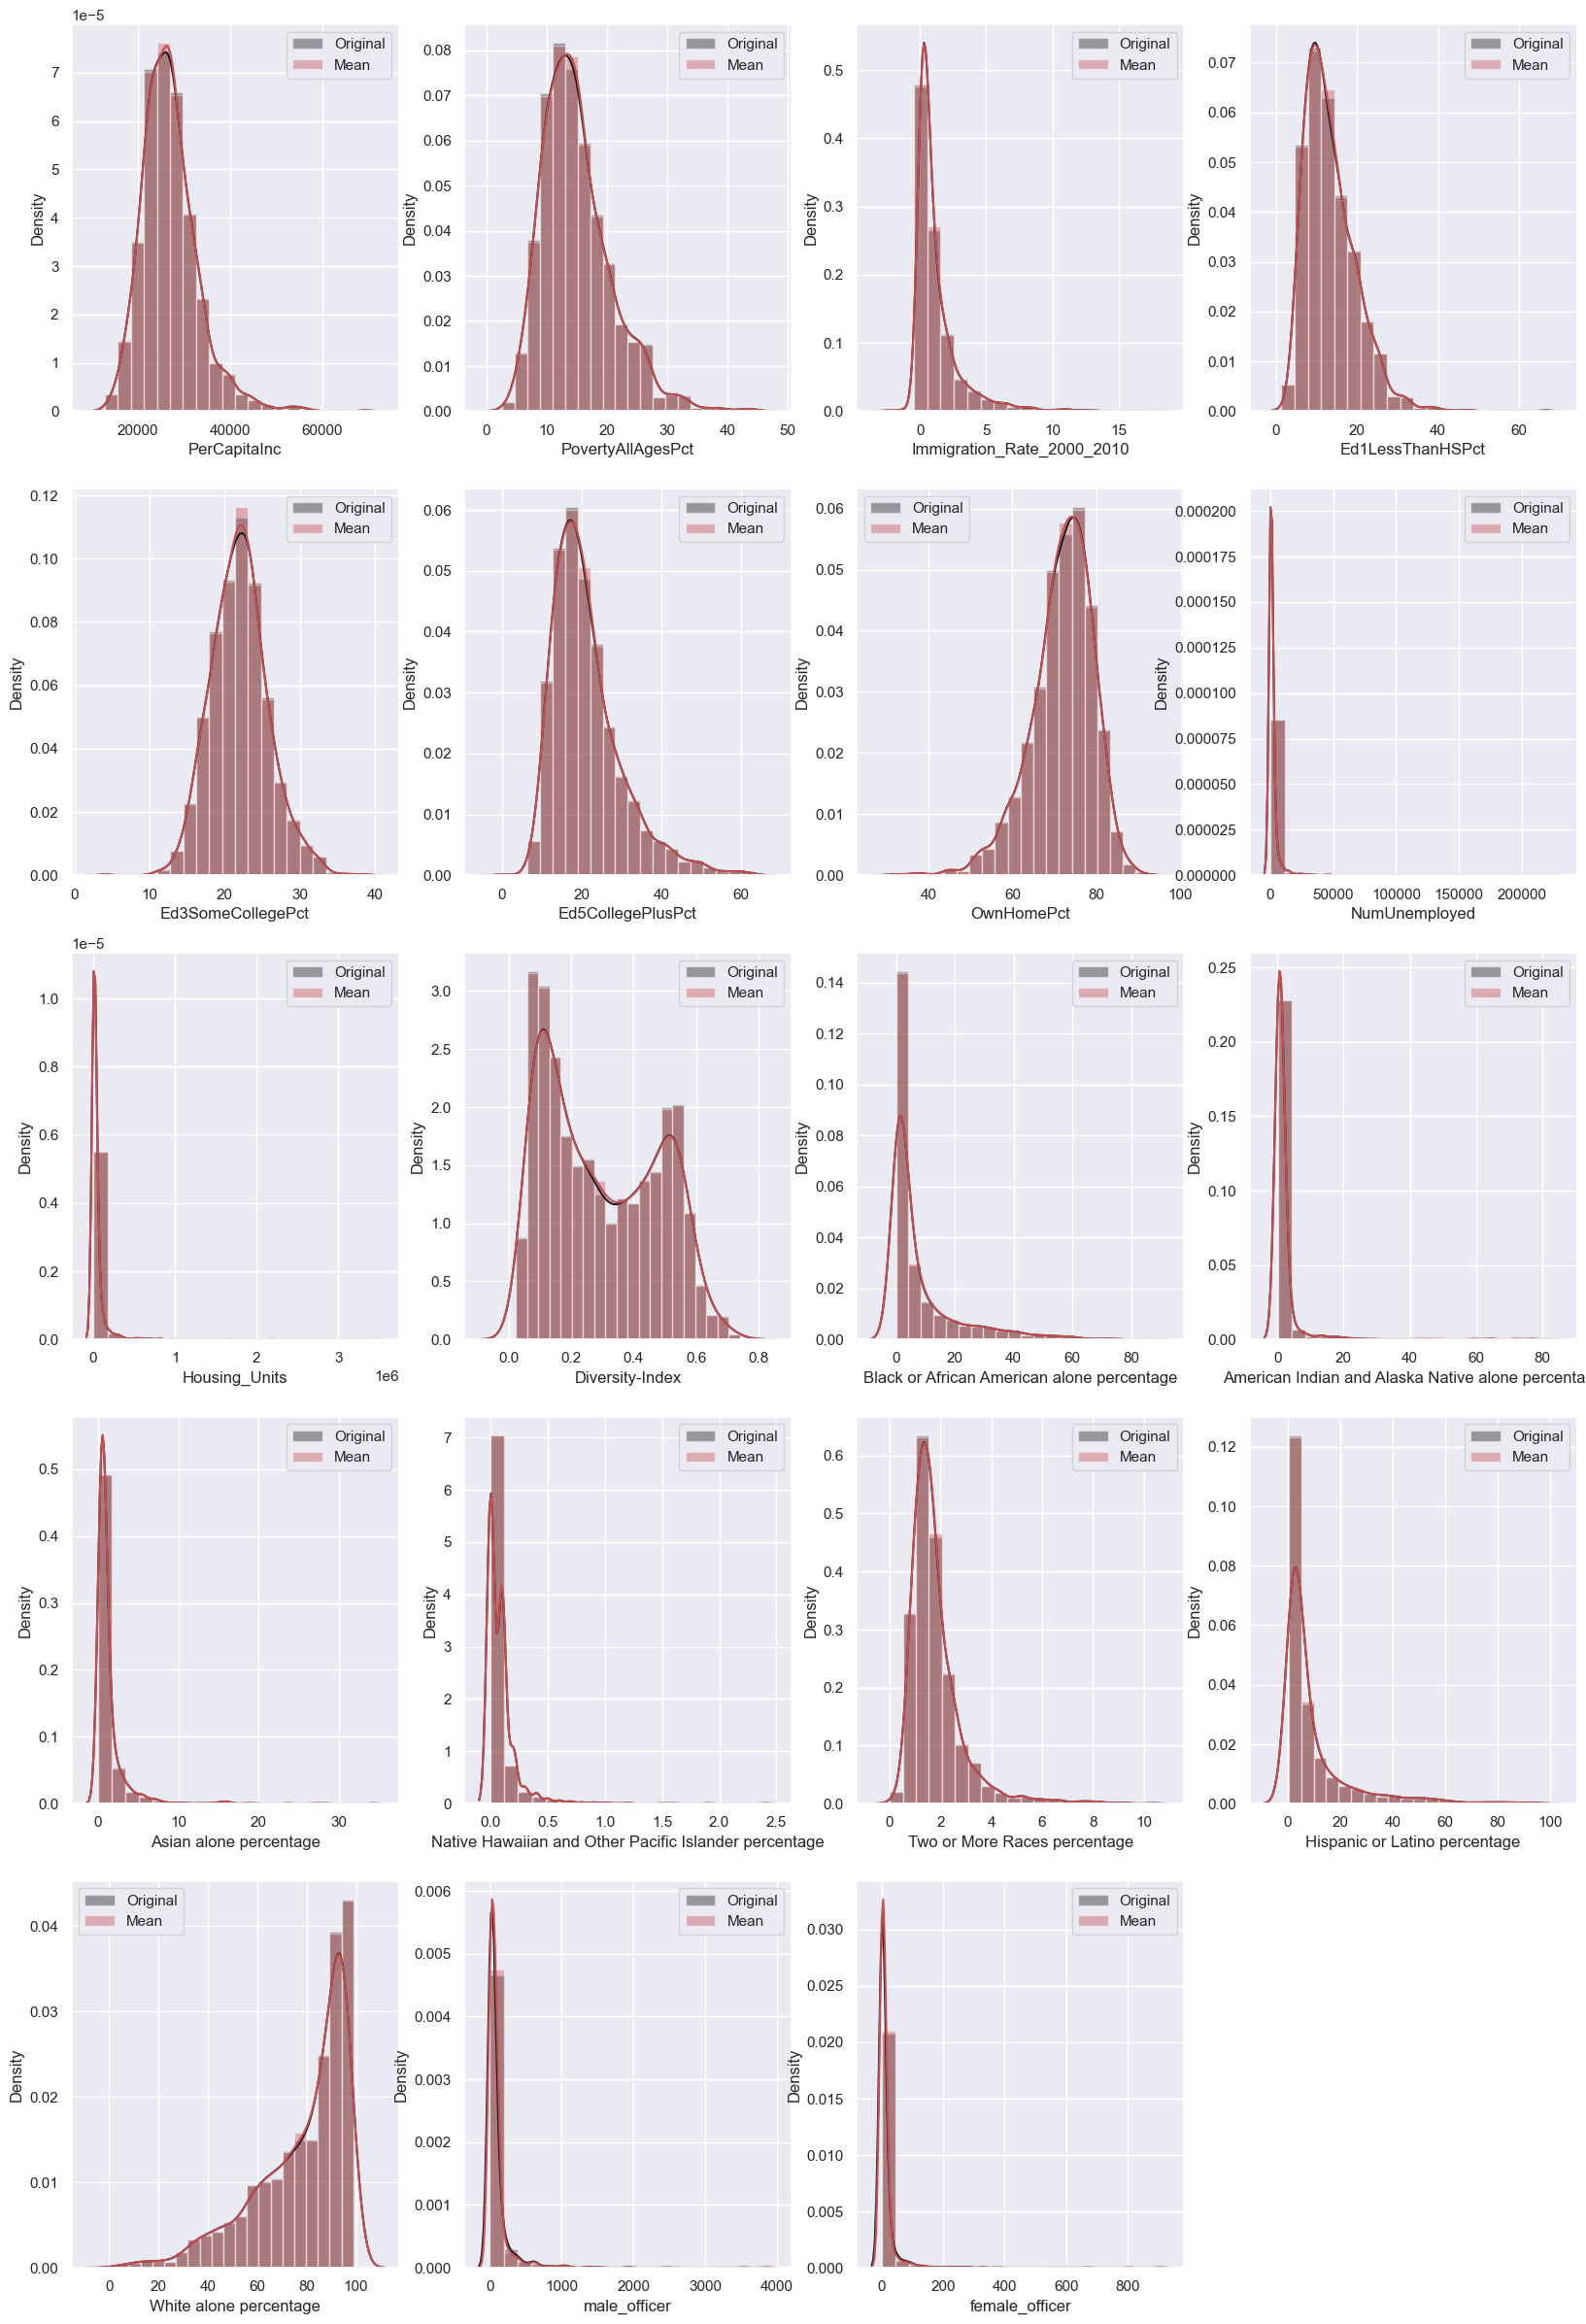

In [33]:
plt.figure(figsize=(20,30))
sns.set()
# plt.title('Mean Distribution Curve',loc='center', fontdict={'fontsize':20})
for i,var in enumerate(num_var_mean):
    plt.subplot(5,4,i+1)
    sns.distplot(X_train[var],bins=20,color='k',label='Original')
    sns.distplot(X_train_clean[var],bins=20,color='r',label='Mean')
    plt.legend()
plt.savefig('meanPlot')
# plt.tight_layout()
plt.show()    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20240\962088993.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[var],bins=20,color='b',label='Original')
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20240\962088993.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-lev

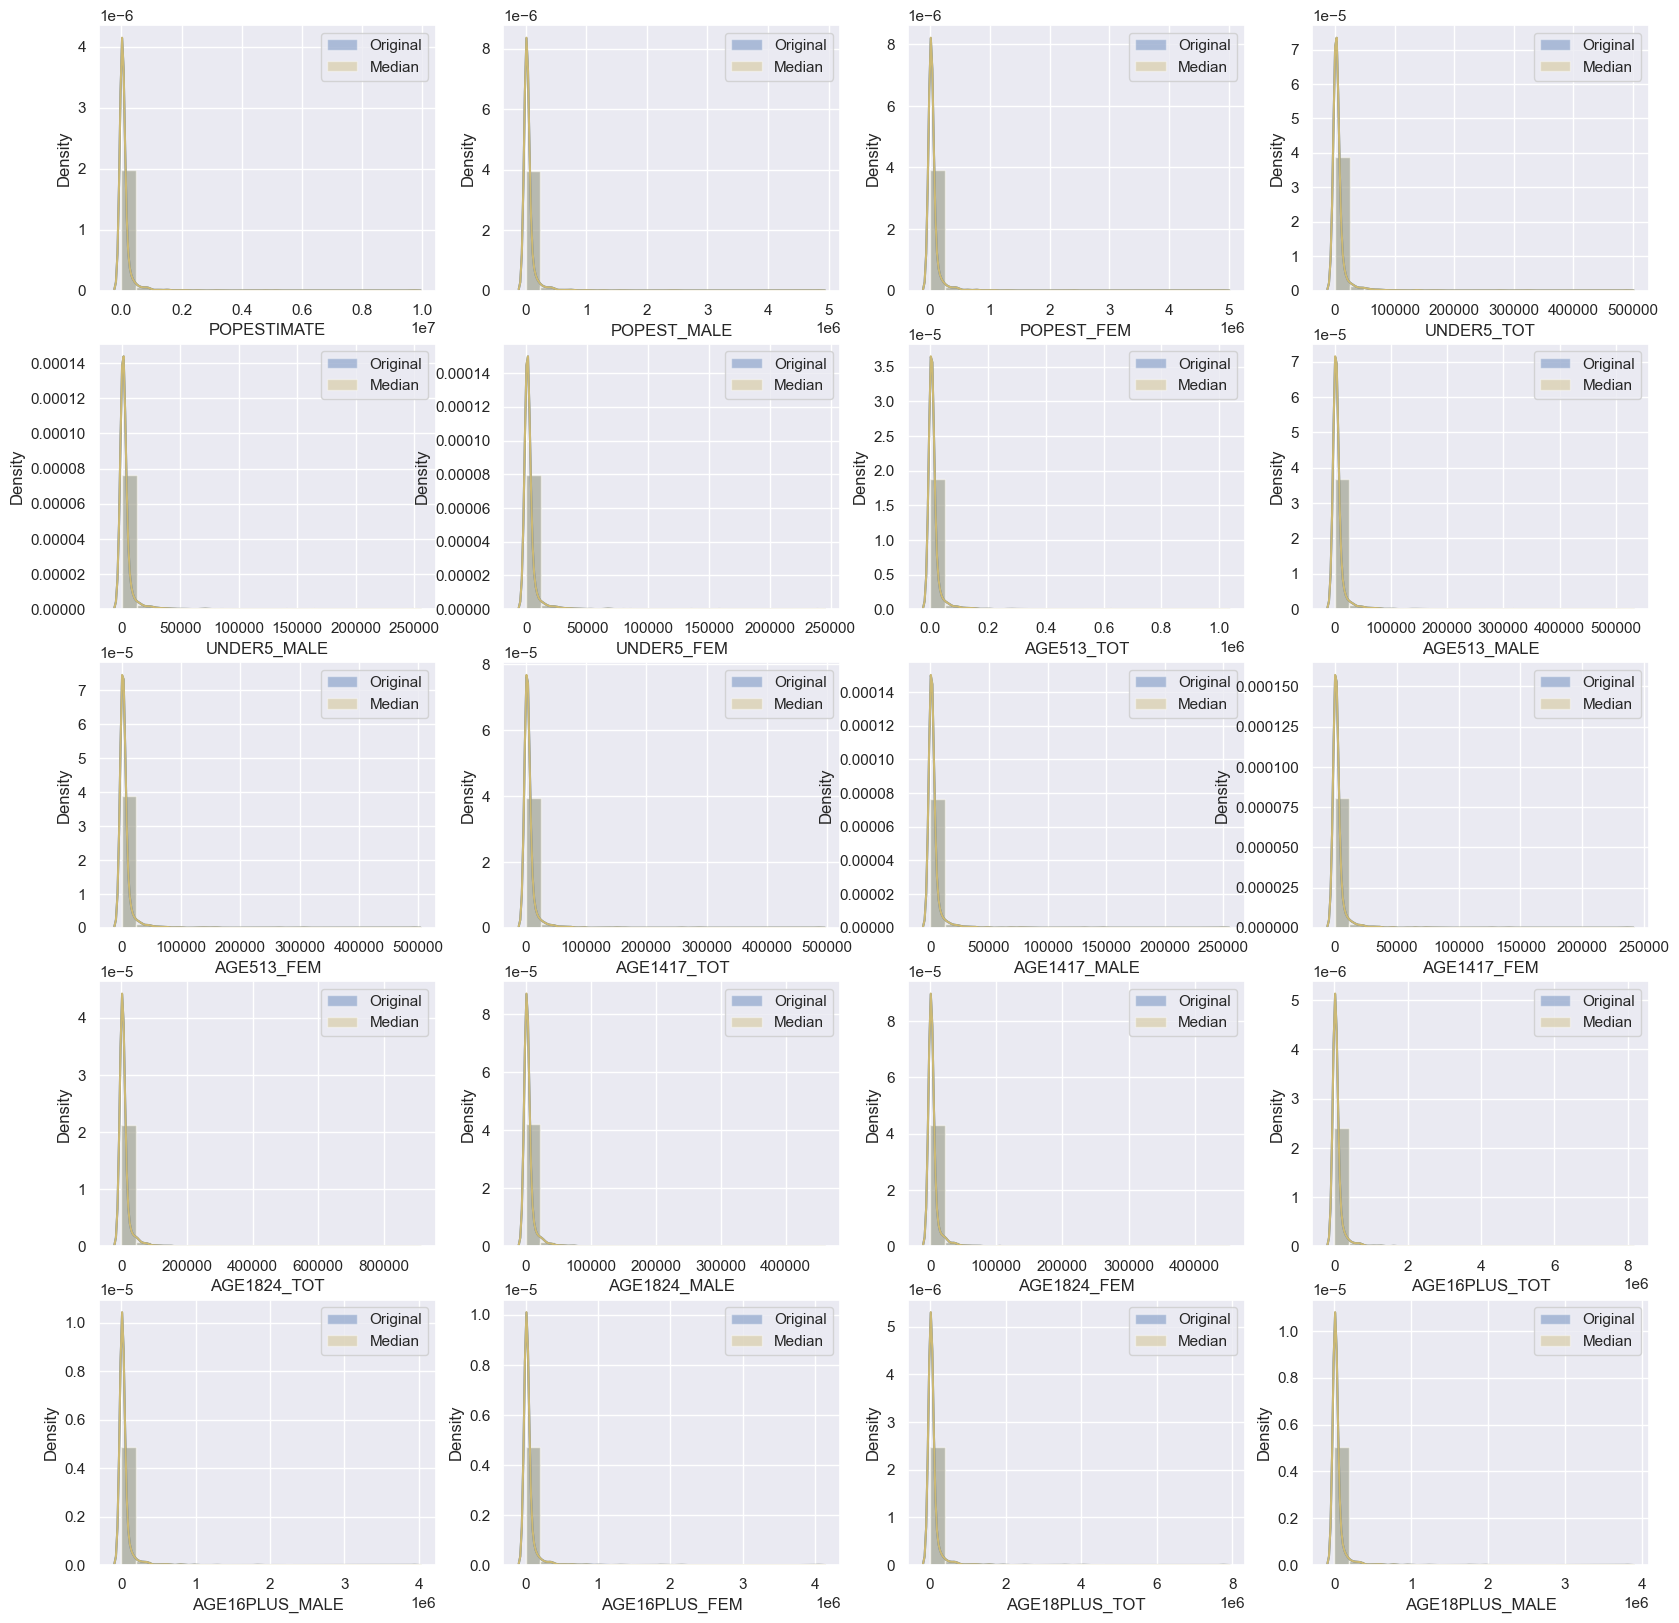

In [34]:
plt.figure(figsize=(20,20))
sns.set()
# plt.title('Median Distribution Curve',loc='center', fontdict={'fontsize':20})
for i,var in enumerate(num_var_median[:20]):
    plt.subplot(5,4,i+1)
    sns.distplot(X_train[var],bins=20,color='b',label='Original')
    sns.distplot(X_train_clean[var],bins=20,color='y',label='Median')
    plt.legend()
    
plt.savefig('medianPlot')
plt.show()

In [35]:
diversity_list= ['Black or African American alone percentage',
 'American Indian and Alaska Native alone percentage',
 'Asian alone percentage',
 'Native Hawaiian and Other Pacific Islander percentage',
 'Two or More Races percentage',
 'Hispanic or Latino percentage',
 'White alone percentage']

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

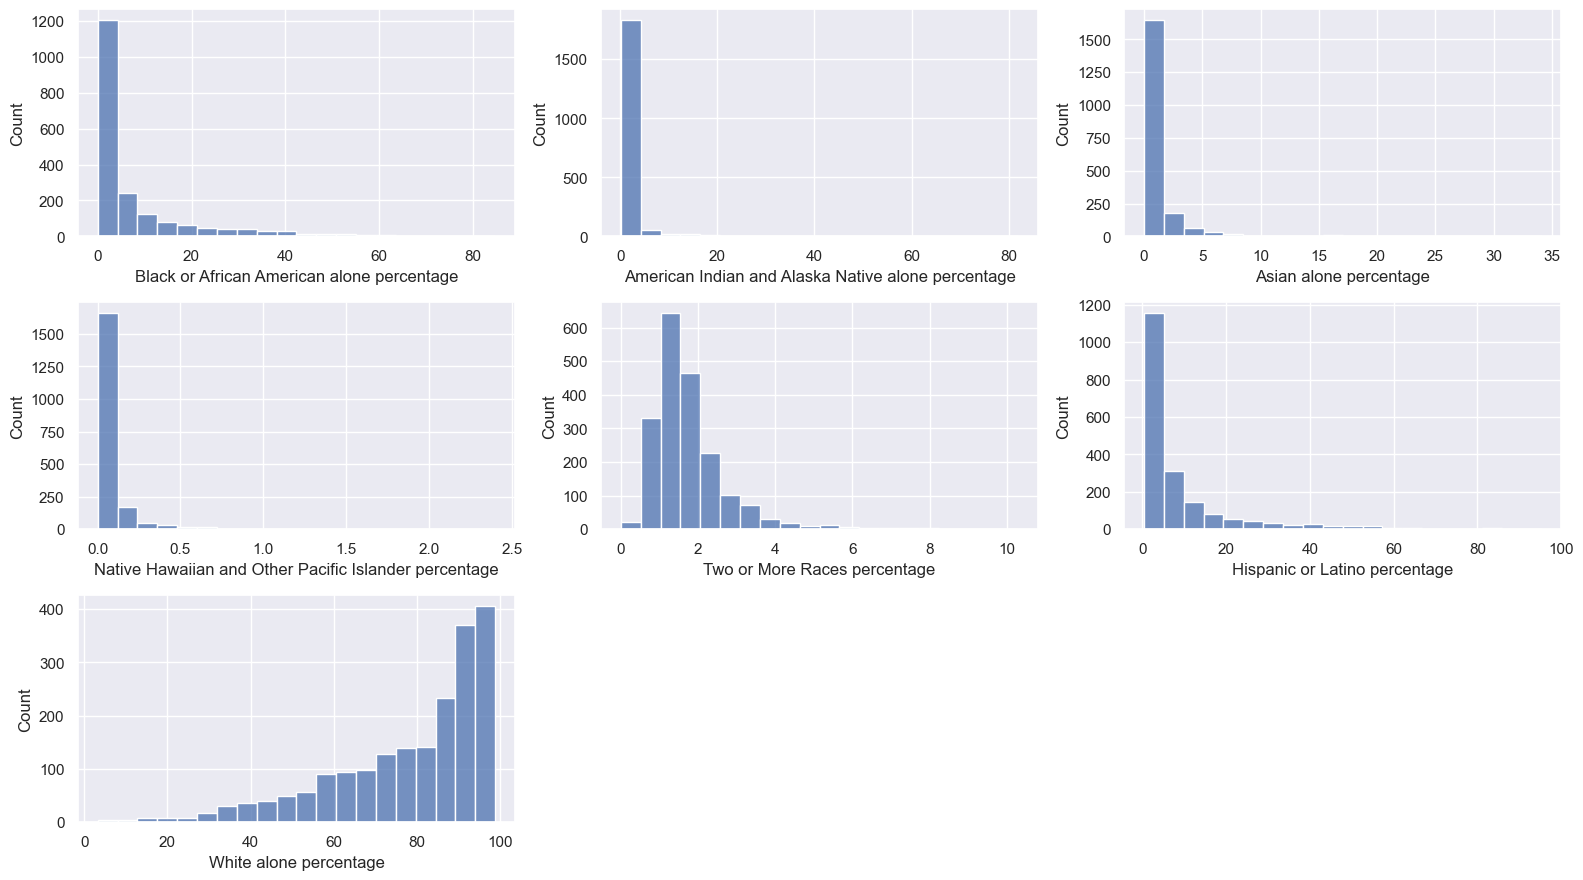

In [36]:
plt.figure(figsize=(16,9))
sns.set()

for i,var in enumerate(diversity_list):
    plt.subplot(3,3,i+1)
    sns.histplot(X_train[var],bins=20)
plt.tight_layout()
plt.savefig('count')# Adjust subplots to fit in to the figure area.
plt.show()


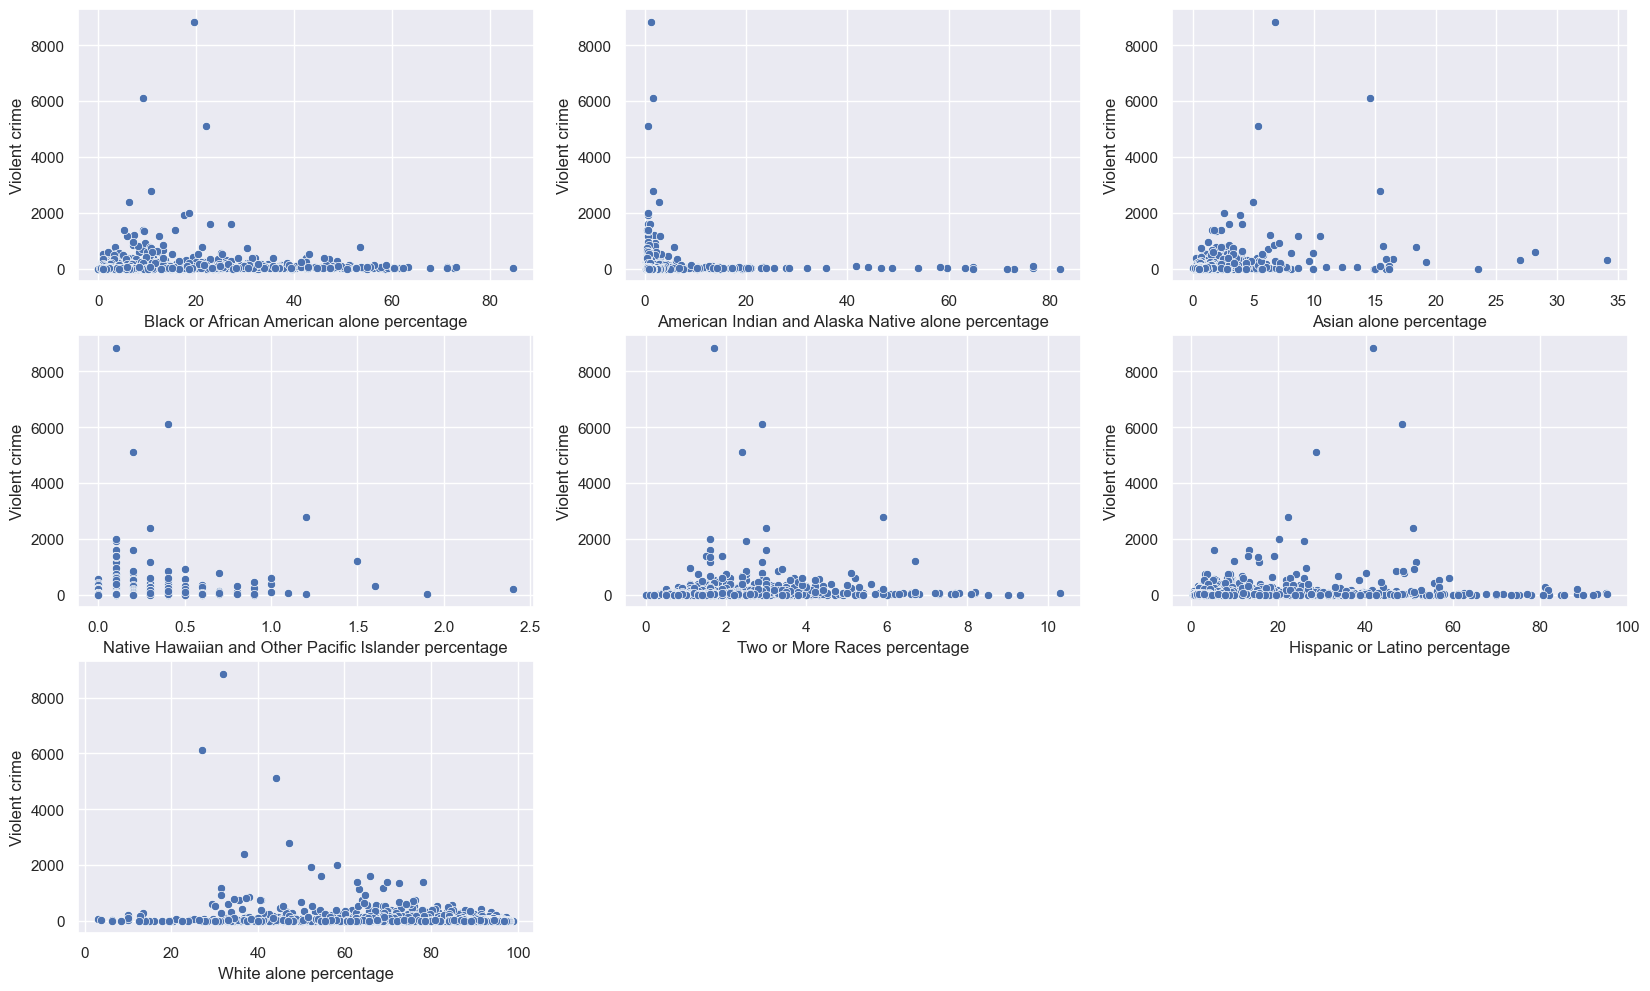

In [40]:
plt.figure(figsize=(20,12))
sns.set()

for i,var in enumerate(diversity_list):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x= X_train[var],y=y_train,)
plt.savefig('diversity')
plt.show()


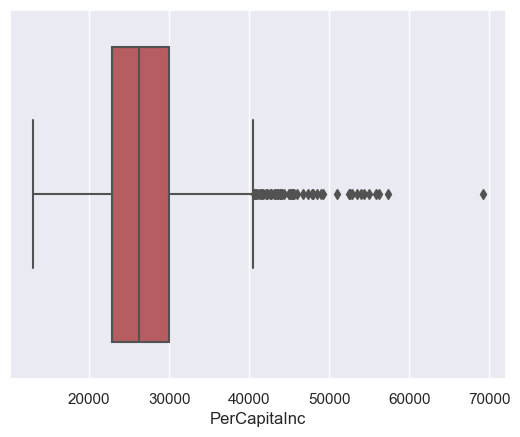

In [42]:
sns.boxplot(data=X_train, x='PerCapitaInc' , color='r')
plt.savefig('PerCapita')
plt.show()

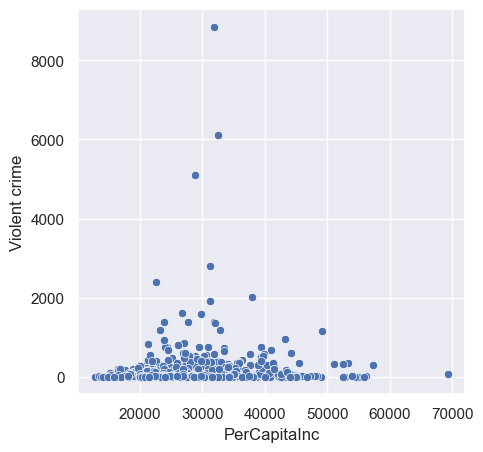

In [43]:
plt.figure(figsize=(5,5))
sns.set()
sns.scatterplot(x= X_train_clean['PerCapitaInc'], y=y_train)
plt.savefig('PerCapita vs Crime')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


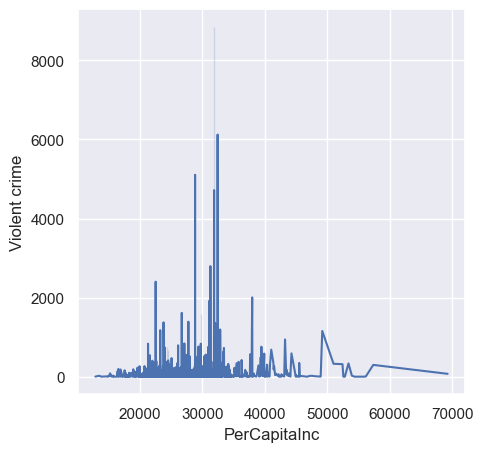

In [44]:
plt.figure(figsize=(5,5))
sns.set()
sns.lineplot(x= X_train_clean['PerCapitaInc'], y=y_train)
plt.savefig('PerCapita vs Crime LineGraph')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


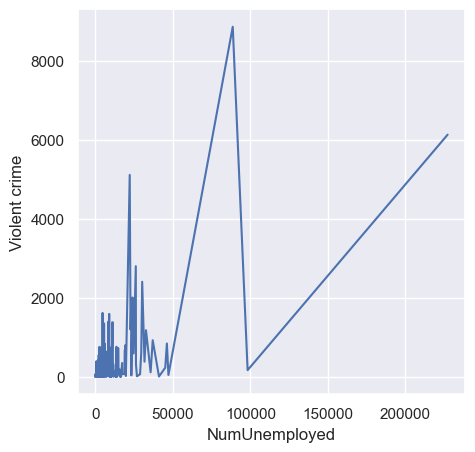

In [45]:
plt.figure(figsize=(5,5))
sns.set()
sns.lineplot(x= X_train_clean['NumUnemployed'], y=y_train, )
plt.savefig('Unemployment vs Crime')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

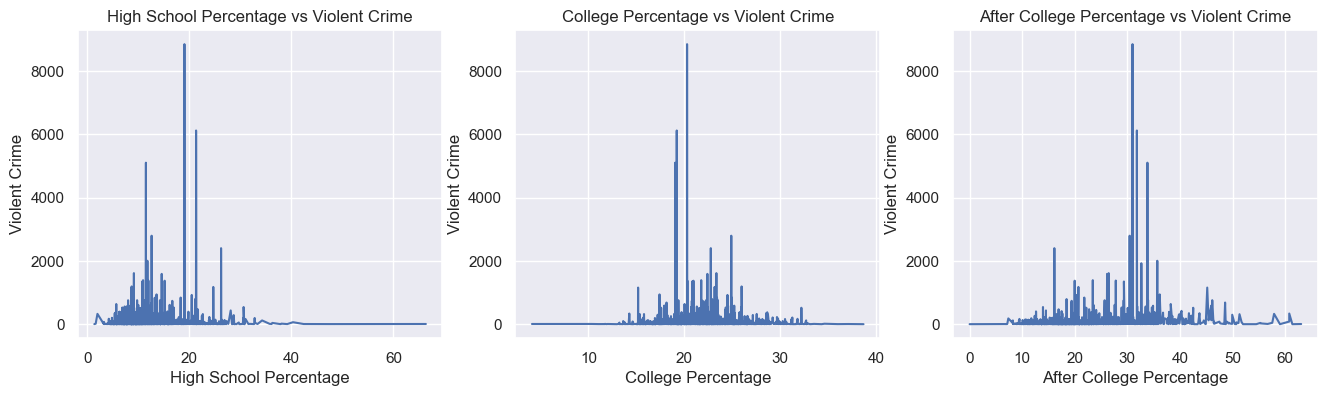

In [55]:
plt.figure(figsize=(16,4))
sns.set()
plt.subplot(1,3,3)
plt.subplot(1, 3, 1)
sns.lineplot(x=X_train_clean['Ed1LessThanHSPct'], y=y_train)
plt.title('High School Percentage vs Violent Crime')
plt.xlabel('High School Percentage')
plt.ylabel('Violent Crime')

# Second subplot
plt.subplot(1, 3, 2)
sns.lineplot(x=X_train_clean['Ed3SomeCollegePct'], y=y_train)
plt.title('College Percentage vs Violent Crime')
plt.xlabel('College Percentage')
plt.ylabel('Violent Crime')

# Third subplot
plt.subplot(1, 3, 3)
sns.lineplot(x=X_train_clean['Ed5CollegePlusPct'], y=y_train)
plt.title('After College Percentage vs Violent Crime')
plt.xlabel('After College Percentage')
plt.ylabel('Violent Crime')
plt.savefig('Education vs Crime')
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


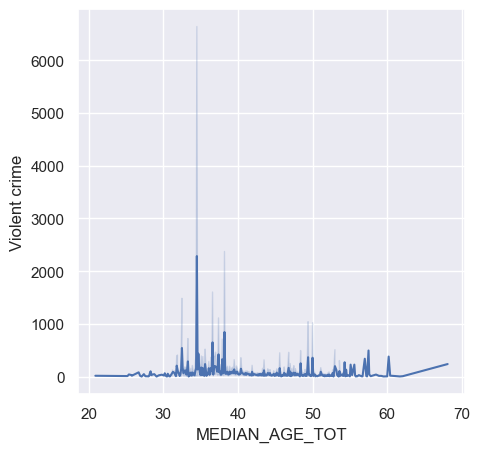

In [57]:
plt.figure(figsize=(5,5))
sns.set()
sns.lineplot(x= X_train_clean['MEDIAN_AGE_TOT'], y=y_train)
plt.savefig('Crime vs Age ')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

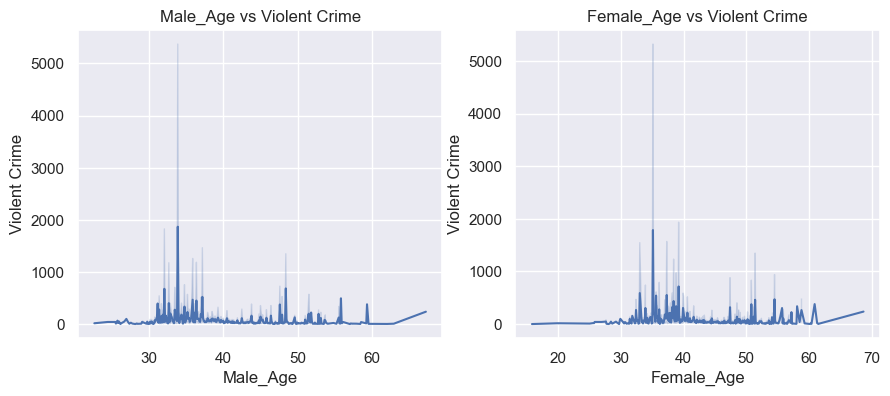

In [58]:
plt.figure(figsize=(16,4))
sns.set()
plt.subplot(1,3,2)
plt.subplot(1, 3, 1)
sns.lineplot(x=X_train_clean['MEDIAN_AGE_MALE'], y=y_train)
plt.title('Male_Age vs Violent Crime')
plt.xlabel('Male_Age')
plt.ylabel('Violent Crime')

plt.subplot(1, 3, 2)
sns.lineplot(x=X_train_clean['MEDIAN_AGE_FEM'], y=y_train)
plt.title('Female_Age vs Violent Crime')
plt.xlabel('Female_Age')
plt.ylabel('Violent Crime')

plt.savefig('Male vs Female Crime')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


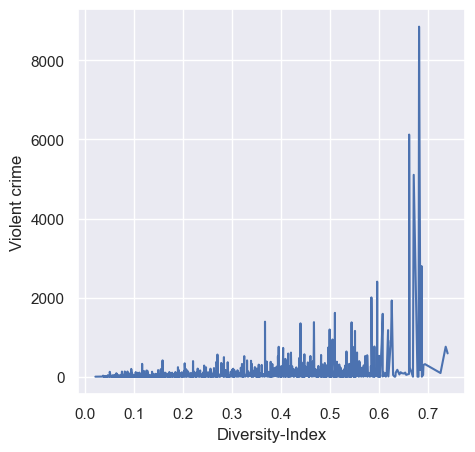

In [59]:
plt.figure(figsize=(5,5))
sns.set()
sns.lineplot(x= X_train_clean['Diversity-Index'], y=y_train)
plt.savefig('Crime vs Diversity-Index')

In [61]:
train_columns= X_train_clean.columns.tolist()
train_columns

['PerCapitaInc',
 'PovertyAllAgesPct',
 'Immigration_Rate_2000_2010',
 'Ed1LessThanHSPct',
 'Ed3SomeCollegePct',
 'Ed5CollegePlusPct',
 'OwnHomePct',
 'NumUnemployed',
 'Housing_Units',
 'Diversity-Index',
 'Black or African American alone percentage',
 'American Indian and Alaska Native alone percentage',
 'Asian alone percentage',
 'Native Hawaiian and Other Pacific Islander percentage',
 'Two or More Races percentage',
 'Hispanic or Latino percentage',
 'White alone percentage',
 'male_officer',
 'female_officer',
 'POPESTIMATE',
 'POPEST_MALE',
 'POPEST_FEM',
 'UNDER5_TOT',
 'UNDER5_MALE',
 'UNDER5_FEM',
 'AGE513_TOT',
 'AGE513_MALE',
 'AGE513_FEM',
 'AGE1417_TOT',
 'AGE1417_MALE',
 'AGE1417_FEM',
 'AGE1824_TOT',
 'AGE1824_MALE',
 'AGE1824_FEM',
 'AGE16PLUS_TOT',
 'AGE16PLUS_MALE',
 'AGE16PLUS_FEM',
 'AGE18PLUS_TOT',
 'AGE18PLUS_MALE',
 'AGE18PLUS_FEM',
 'AGE1544_TOT',
 'AGE1544_MALE',
 'AGE1544_FEM',
 'AGE2544_TOT',
 'AGE2544_MALE',
 'AGE2544_FEM',
 'AGE4564_TOT',
 'AGE4564_MALE',

In [62]:
test_columns= X_test_clean.columns.tolist()
test_columns

['PerCapitaInc',
 'PovertyAllAgesPct',
 'Immigration_Rate_2000_2010',
 'Ed1LessThanHSPct',
 'Ed3SomeCollegePct',
 'Ed5CollegePlusPct',
 'OwnHomePct',
 'NumUnemployed',
 'Housing_Units',
 'Diversity-Index',
 'Black or African American alone percentage',
 'American Indian and Alaska Native alone percentage',
 'Asian alone percentage',
 'Native Hawaiian and Other Pacific Islander percentage',
 'Two or More Races percentage',
 'Hispanic or Latino percentage',
 'White alone percentage',
 'male_officer',
 'female_officer',
 'POPESTIMATE',
 'POPEST_MALE',
 'POPEST_FEM',
 'UNDER5_TOT',
 'UNDER5_MALE',
 'UNDER5_FEM',
 'AGE513_TOT',
 'AGE513_MALE',
 'AGE513_FEM',
 'AGE1417_TOT',
 'AGE1417_MALE',
 'AGE1417_FEM',
 'AGE1824_TOT',
 'AGE1824_MALE',
 'AGE1824_FEM',
 'AGE16PLUS_TOT',
 'AGE16PLUS_MALE',
 'AGE16PLUS_FEM',
 'AGE18PLUS_TOT',
 'AGE18PLUS_MALE',
 'AGE18PLUS_FEM',
 'AGE1544_TOT',
 'AGE1544_MALE',
 'AGE1544_FEM',
 'AGE2544_TOT',
 'AGE2544_MALE',
 'AGE2544_FEM',
 'AGE4564_TOT',
 'AGE4564_MALE',

In [67]:
ss= StandardScaler()
ss.fit(X_train_clean)
X_train_ss= ss.fit_transform(X_train_clean)
X_test_ss= ss.fit_transform(X_test_clean)

In [69]:
y_test.head()

0    116
1     21
2      4
3      5
4     11
Name: Violent crime, dtype: int64

In [79]:
svr_model = SVR(kernel='linear', C=3.0, epsilon=0.1)
svr_model.fit(X_train_ss, y_train)

SVR(C=3.0, kernel='linear')

In [82]:
y_pred = svr_model.predict(X_test_ss)

In [81]:
svr_model.score(X_test_ss, y_test)

0.2820036665406974

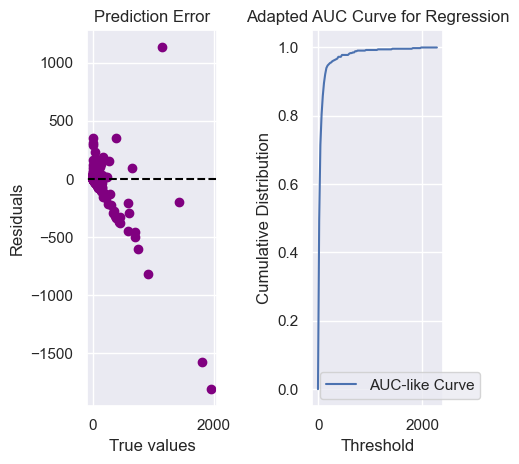

In [88]:
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred - y_test, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Prediction Error')
plt.xlabel('True values')
plt.ylabel('Residuals')

# Adapted AOC curve (for illustration)
plt.subplot(1, 3, 3)
thresholds = np.linspace(min(y_pred), max(y_pred), 100)
auc_values = [np.sum(y_test <= t) / len(y_test) for t in thresholds]
plt.plot(thresholds, auc_values, label='AUC-like Curve')
plt.title('Adapted AUC Curve for Regression')
plt.xlabel('Threshold')
plt.ylabel('Cumulative Distribution')
plt.legend()

plt.tight_layout()
plt.savefig('Prediction')
plt.show()
